## 최적화 이론
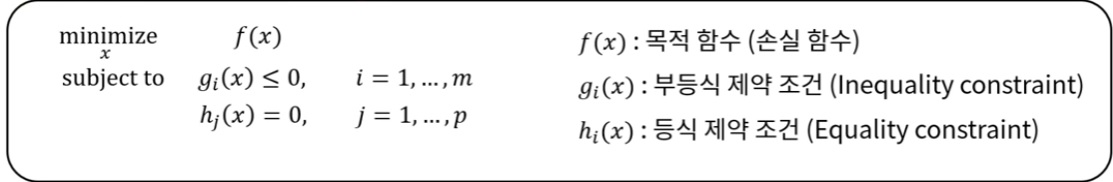
- 가능한 모든 해 중 최적의 해를 찾는 문제를 해결하는 이론
- 연속 변수와 불연속 변수에 따라 크게 둘로 나누어짐
  - 해당 강의에서는 연속 변수만 다루도록 함
- **부등식 및 등식 제약 조건을 지키면서, 목적 함수가 최소가 되게하는 x를 찾는 문제**
- 최소화 문제의 반대말은 최대화 문제(minimization problem / maximization problem)
  - f(x)에 마이너스를 붙이면 자연스럽게 maximization이 될 수도 있음
- f(x)의 형태에 따라 다양한 문제 해결 알고리즘이 있으나, 여기서는 다루지 않음
- 딥러닝에서 대부분 제약 조건은 **사용하지 않음**

## 분석적 방법 vs 수치적 방법
### 1. 분석적 방법(Analytical method)
- 함수의 **모든 구간을 수식으로 알 때 사용하는 수식적인 해석 방법**
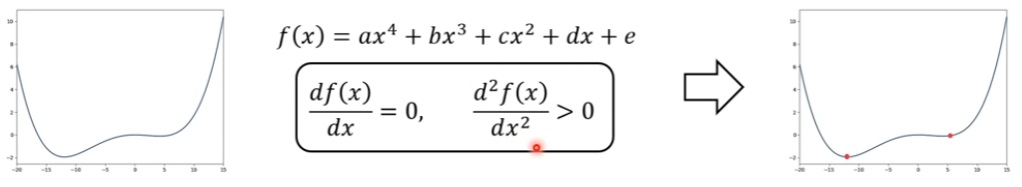
  - 미분값이 0 : 극값이 존재 / 위로 볼록, 아래로 볼록인지도 확인이 가능
  
### 2. 수치적 방법(Numerical method)
- 함수의 형태와 수식을 알지 못할때 사용하는 수치적인 방법

## Local vs Global solution
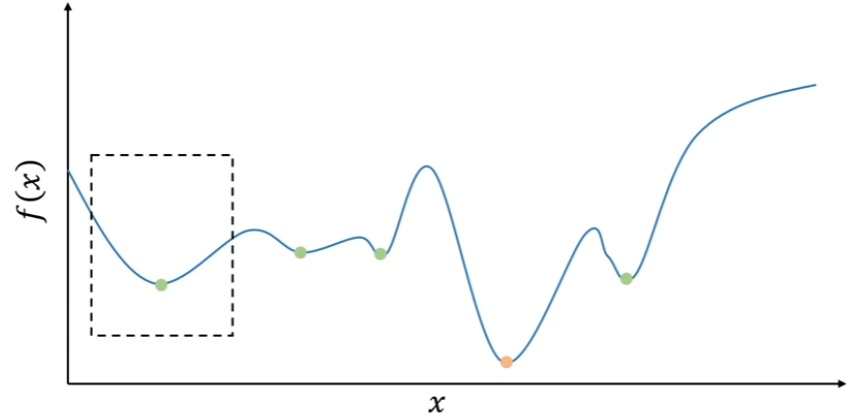
- 전역 솔루션(Global Solution)은 정의역에서 단 하나 존재한다.
- 지역 솔루션(Local Solution)은 여러개일 수 있다.
- **따라서 일반적으로 하나의 솔루션을 찾았을 때 local인지 global인지 확신할 수는 없다**

### 이를 딥러닝 관점에서 살펴보도록 하자
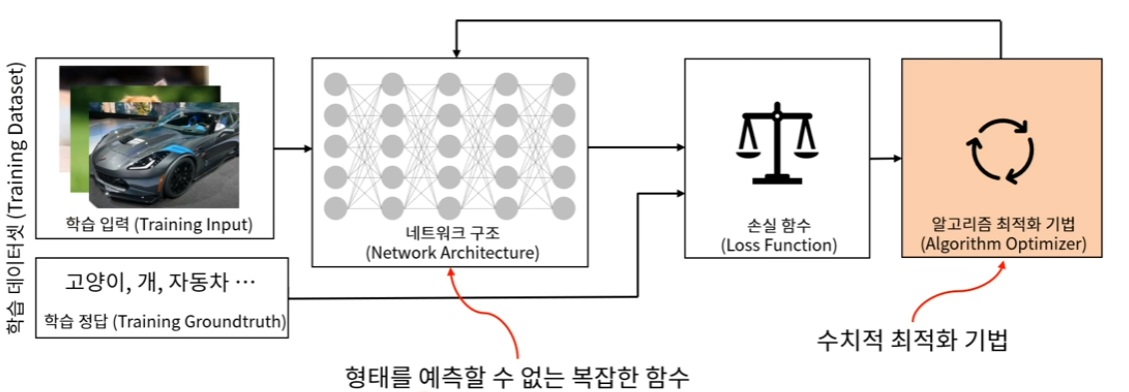
- 딥러닝 네트워크의 학습은 **손실 함수가 최소가 되게 하는 파라미터를 구하는 최적화 문제**로 볼 수 있다.

## Gradient Descent(경사하강법)

### 1. 기원 : 무차별 대입법(Brute Force)
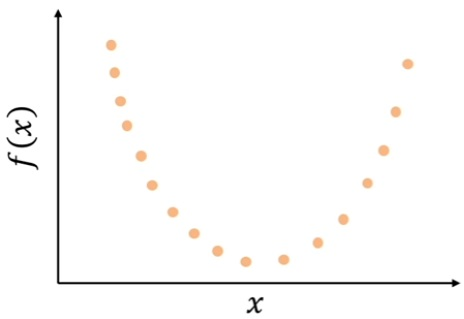
- 가능한 모든 수를 대입해보는 방법
- 가장 단순한 방법으로 함수를 알 수 있음
- 아래의 문제로 최적화에 이용할 수는 없음
  - **최적값이 존재하는 범위를 알아야 함**
  - x를 정확히 찾기 위해 **무한히 촘촘하게 조사해야 함**
  - f(x)의 **계산 복잡도가 매우 높음**

## 사전 지식 : 미분과 기울기
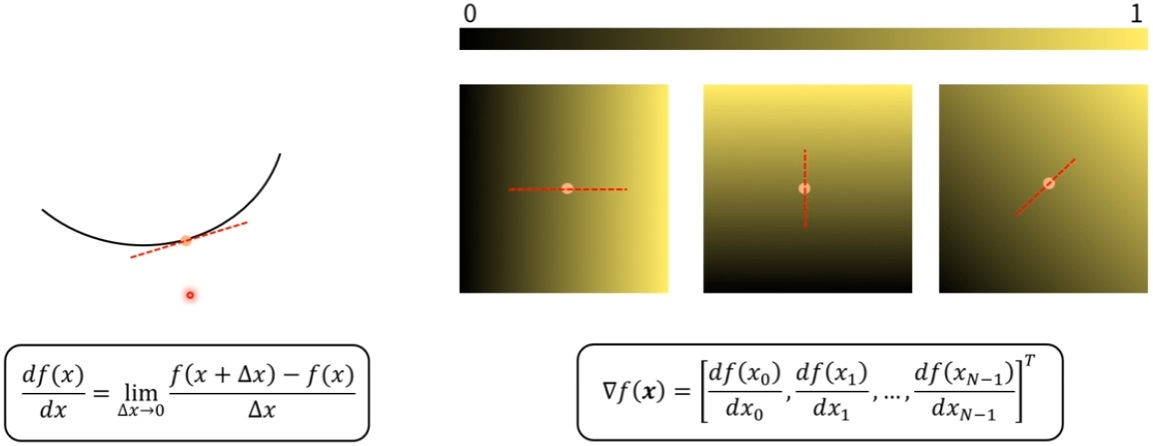
- 기울기(Gradient)는 스칼라를 벡터로 미분한 것이며, 벡터의 각 요소로 미분하면 됨

## 경사 하강법
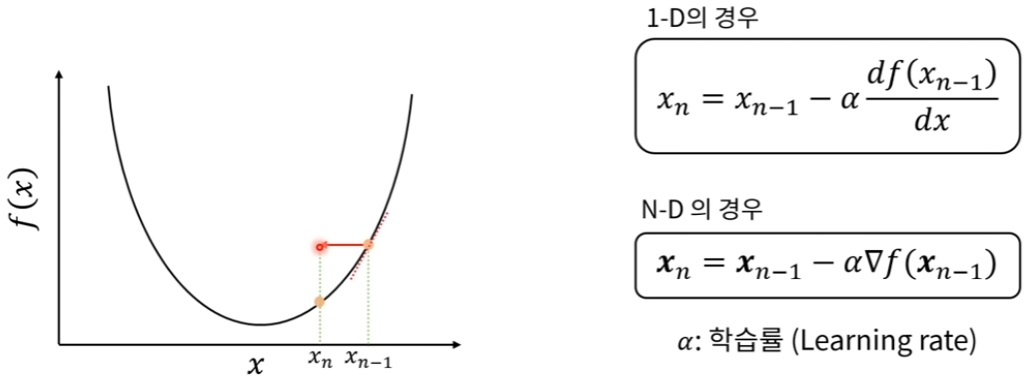
- 경사 하강법은 f(x)의 값이 **변하지 않을 때까지 스텝을 반복한다.**
  - 다만, 실제 계산에 있어 정말 작은 값이 존재할 수 있기 때문에 관용을 주어 제어함
- 이에 따른 적절한 학습률을 선택하는 것은 매우 중요하다.

## 볼록 함수
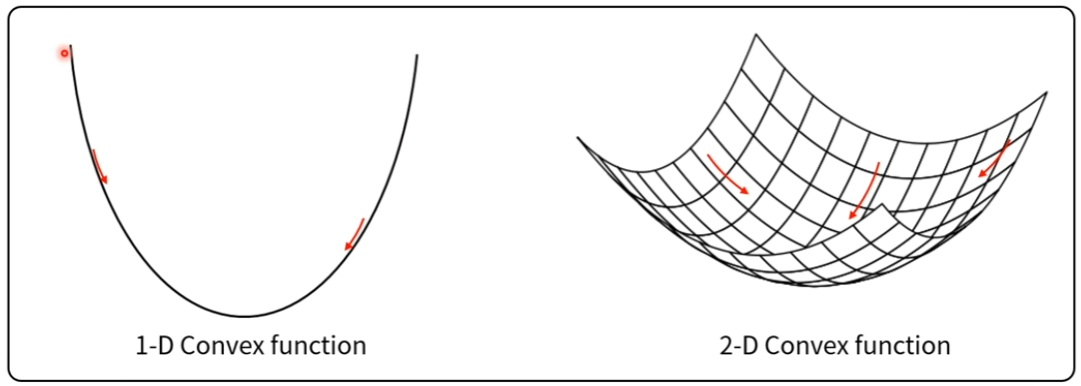
- 볼록 함수(Convex function)는 어디서 시작하더라도 경사 하강법으로 최적값에 도달할 수 있음
- 다만 현실은 녹록치않지

## 비볼록 함수
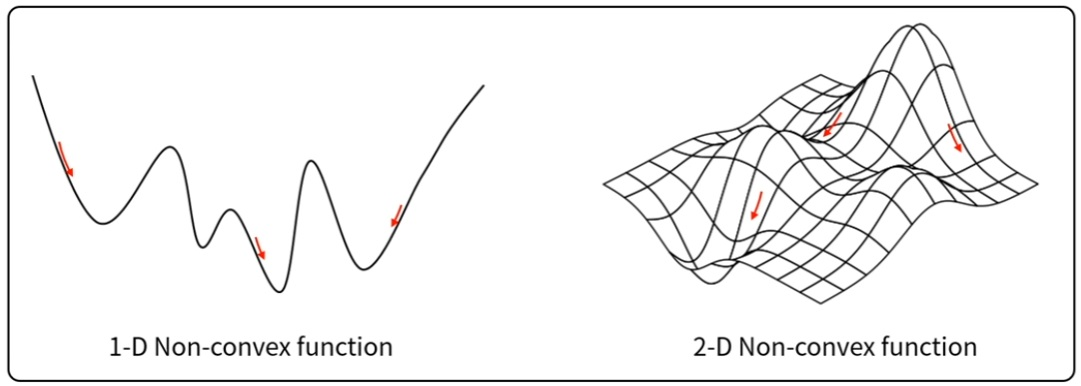
- 비볼록 함수(Non-convex function)는 시작 위치에 따라 다른 최적값을 찾는다.
  - 즉, **local minimum**에 빠질 위험이 있음

## Saddle Point : 안장점
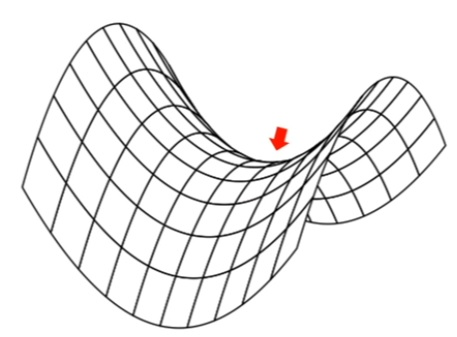
- 기울기가 0이 되지만 극값이 아닌 지점
- 경사 하강법은 안장점에서 벗어나지 못한다는 특징을 가진다.

## 이를 해결하기 위한 방법 1 : Momentum
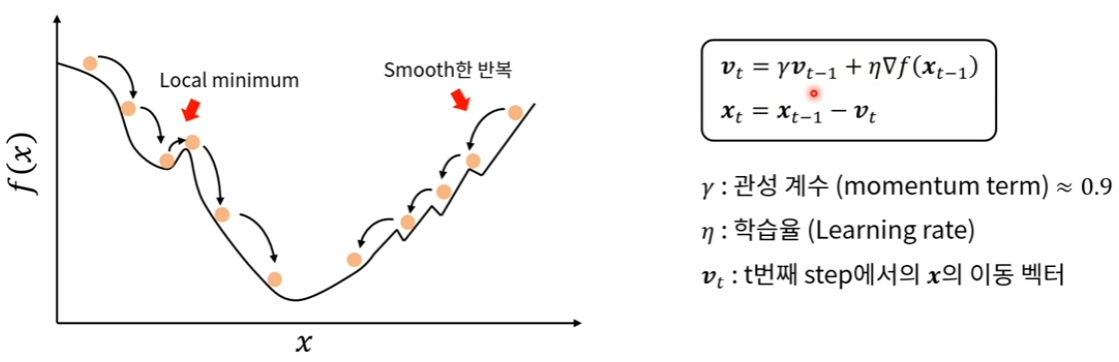
- 관성(Momentum) : 돌이 굴러 떨어지듯, 이동 벡터를 이용해 이전 기울기에 영향을 받는 알고리즘
- 관성을 이용하면 Local minimum과 잡음에 대처할 수 있다
- 이동 벡터를 추가로 사용하므로, 경사 하강법 대비 **2배의 메모리를 사용한다는 특징(단점)을 가짐**

## 이를 해결하기 위한 방법 2 : AdaGrad
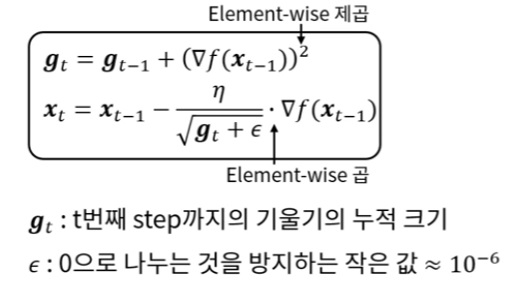
- gradient의 제곱을 계속 더해주면 $g_t$를 갱신
  - 이를 분모로 들어가게 하여 $g_t$가 커진다면 학습율이 자연스레 감소되는 특징을 가짐
- 적응적 기울기(Adaptive gradient : AdaGrad) : 변수별로 학습율이 달라지게 조절하는 알고리즘
- 기울기가 커서 학습이 많이 된 변수는 **학습율을 감소**시켜 다른 변수들이 잘 학습되도록 한다.
- $g_t$가 계속해서 커져서 학습이 오래 진행되면 **더이상 학습이 이루어지지 않는 단점**이 존재함

## AdaGrad의 개선 : RMSProp
- AdaGrad의 문제점을 개선. 합 대신 지수평균을 사용
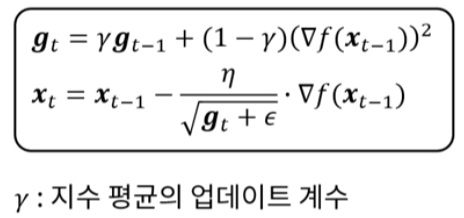
- 변수 간의 상대적인 학습율 차이는 유지하면서 $g_t$가 무한정 커지지 않아 학습을 오래할 수 있다.

## 각 장점을 합친 Adam(Adaptive moment estimation)
- RMSProp과 Momemtum의 장점을 결합한 알고리즘
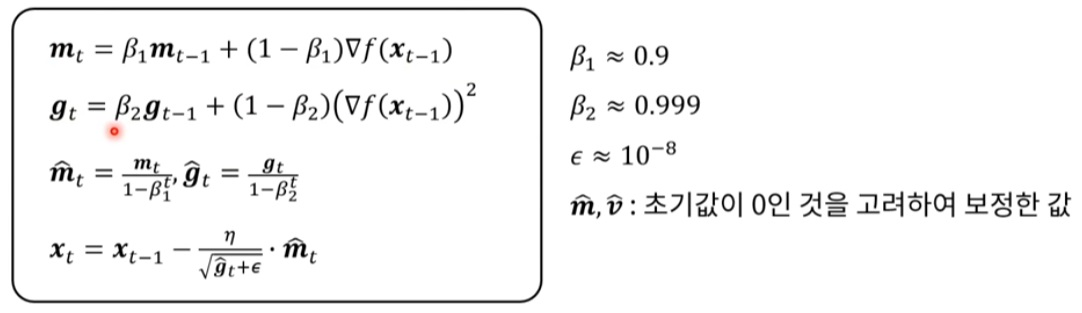
- $\hat{m}_t$와 $\hat{g}_t$가 있는 이유 : 첫 시작이 0이기 때문에 너무 작은 값으로 시작하게 됨
  - 없는 항만큼을 보정해주기 위해 존재함
- Adam 최적화 방법은 가장 최신의 기술(state-of-the-art)이며, 딥러닝에서 가장 많이 사용된다.

## 실습 시작 전 : Matplotlib 소개
- 출판 가능한 품질로 다양한 그림을 그려주는 오픈소스 라이브러리
- 상호작용이 가능하고 다양한 플랫폼으로 출력할 수 있음
### 기본 구성 요소 : Figure와 Axe
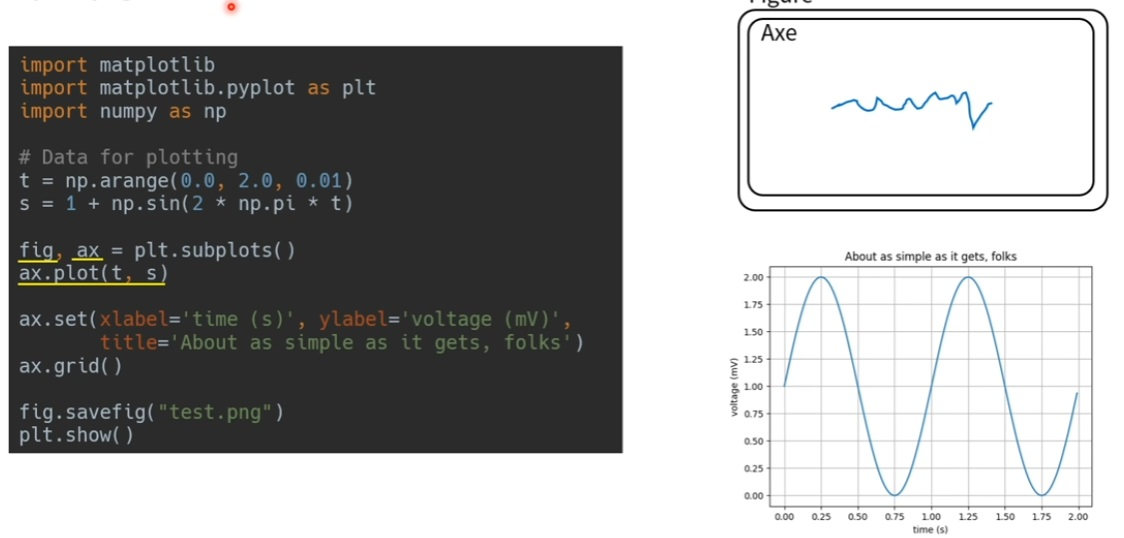
- Figure : 전체에 해당하는 캔버스
  - Figure 안에 여러 개의 Axe를 넣어 사용이 가능

### 여러 그림 동시에 그리기
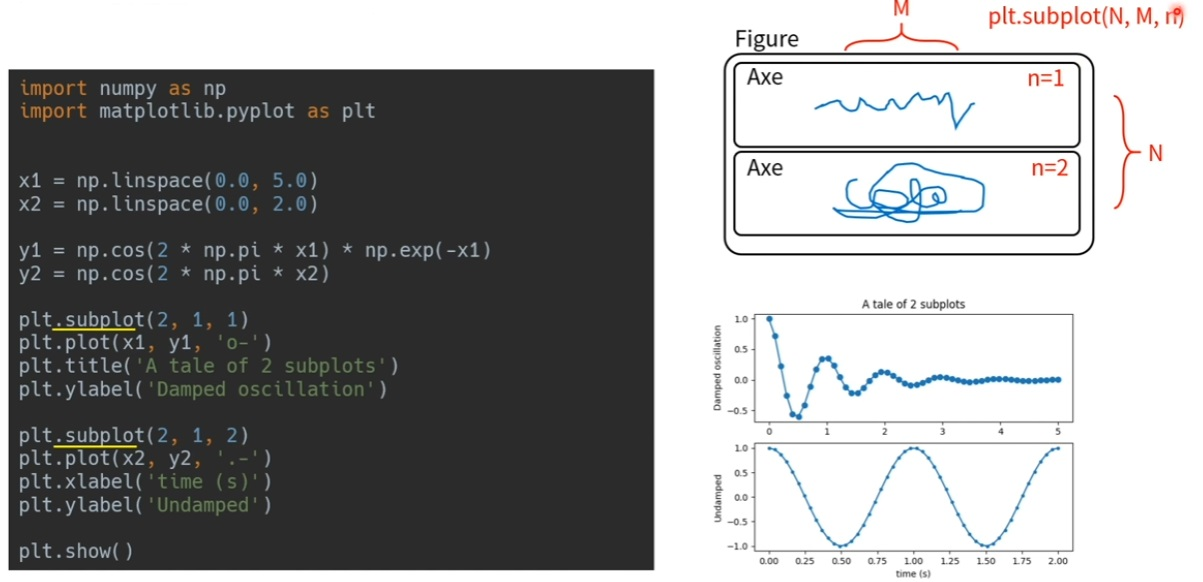

## 행렬 그리기
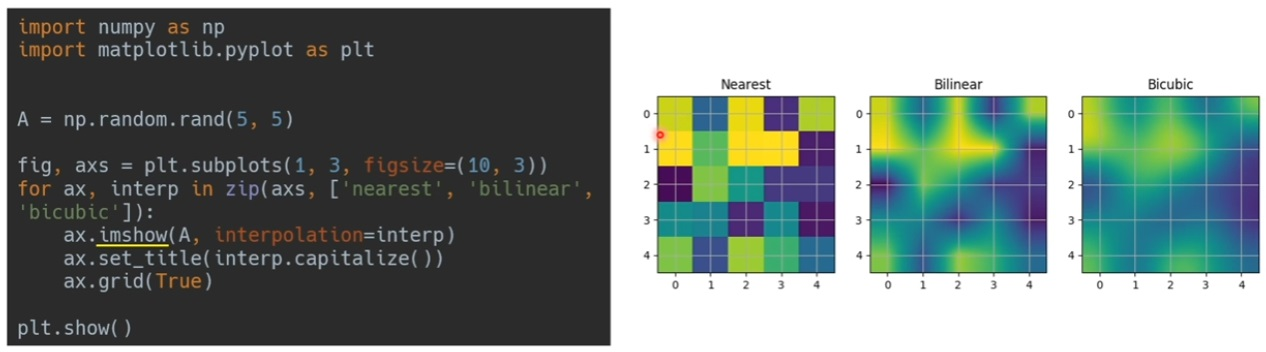
- interpolation : 간격 사이사이를 어떻게 채우는가에 대한 정의
- Nearest : 경계선에 맞추어 설정(각지게 표현됨)
- Bilinear : 각각의 경계선에 상관없이 각 값들을 linear하게 합쳐주면서 표현
- Bicubic : 2차식으로 표현
  - 일반적으로 Nearest를 사용. 학습된 필터를 확인하는데 유용하다.

## 화살표 표현(Quiver)
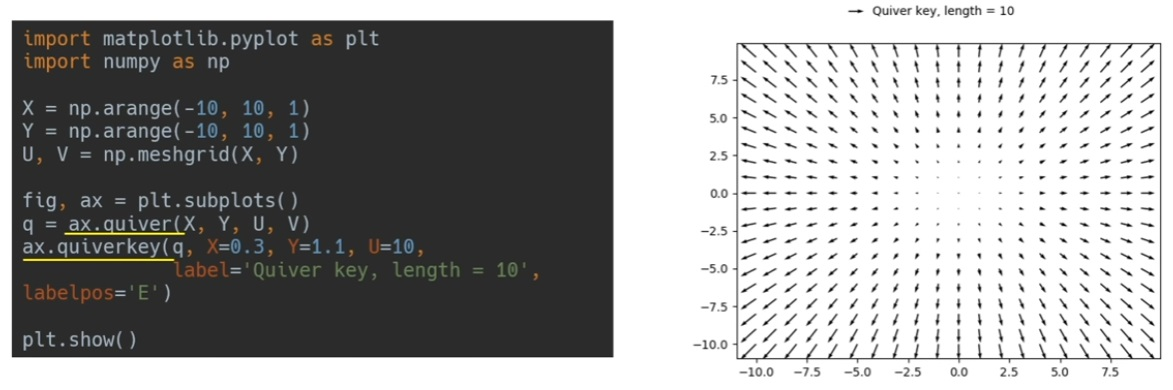
- Gradient 표현, 이동 벡터 표현 시 유용

## 실습 : Gradient Descent 최적화 구현

In [1]:
# 손실 함수 정의(Analytic)
import numpy as np
def f(x):
    return 0.1*x**4 - 1.5*x**3 + 0.6*x**2 + 1.0*x + 20.0

In [2]:
# 손실 함수 미분 정의
def df_dx(x):
    return 0.4*x**3 - 4.5*x**2 + 1.2*x + 1.0

In [3]:
# 하이퍼파라미터 정의
x=5
eps=1e-5
lr=0.01
max_epoch=1000

In [10]:
# Gradient Descent 알고리즘 구현
def gradient_descent(initial_x, learning_rate=0.01, eps=1e-5, max_epoch=1000):
    x=initial_x
    
    x_log=[x]
    
    min_x=x
    min_y=f(min_x)
    for _ in range(max_epoch):#천 번의 gradient 진행
        grad=df_dx(x)
        new_x=x-learning_rate*grad #새로운 x=기존 x-학습율*미분
        y=f(new_x)#새롭게 이동된 점을 도출
        
        x_log.append(new_x)#시각화 용도의 로그용 점 리스트 저장
    
        if min_y>y:
            min_x=new_x
            min_y=y
        
        if np.abs(x-new_x)<eps: #값이 거의 변하지 않았을 때
            break
        
        x=new_x
        
    return min_x, min_y, x_log

In [5]:
print(min_x,min_y)

10.955323272631201 -428.84677390087836


- x의 초기값이 달라짐에 따라 결과값은 달라질 것
- 실제로 x=-5로 할 경우 값이 달라지는 문제가 발생함
  - 이것이 **local minimum 문제**

## 실습 : 위의 함수 Visualization

In [15]:
import matplotlib.pyplot as plt

min_x1, min_y1, x_log1=gradient_descent(initial_x=5)
min_x2, min_y2, x_log2=gradient_descent(initial_x=-5)
min_x3, min_y3, x_log3=gradient_descent(initial_x=0)
min_x4, min_y4, x_log4=gradient_descent(initial_x=15,learning_rate=0.005)

y_log1=f(np.array(x_log1))
y_log2=f(np.array(x_log2))
y_log3=f(np.array(x_log3))
y_log4=f(np.array(x_log4))

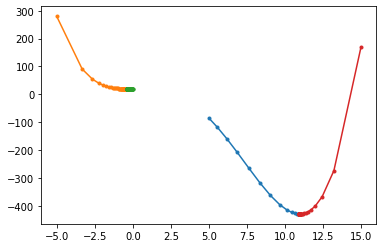

In [16]:
plt.plot(x_log1,y_log1,'.-')
plt.plot(x_log2,y_log2,'.-')
plt.plot(x_log3,y_log3,'.-')
plt.plot(x_log4,y_log4,'.-')
plt.show()

- learning rate 에 따라 날라가는 plot이 생기게 된다.(lr의 중요성)

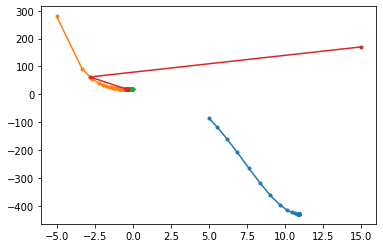

In [17]:
min_x1, min_y1, x_log1=gradient_descent(initial_x=5)
min_x2, min_y2, x_log2=gradient_descent(initial_x=-5)
min_x3, min_y3, x_log3=gradient_descent(initial_x=0)
min_x4, min_y4, x_log4=gradient_descent(initial_x=15,learning_rate=0.05)

y_log1=f(np.array(x_log1))
y_log2=f(np.array(x_log2))
y_log3=f(np.array(x_log3))
y_log4=f(np.array(x_log4))

plt.plot(x_log1,y_log1,'.-')
plt.plot(x_log2,y_log2,'.-')
plt.plot(x_log3,y_log3,'.-')
plt.plot(x_log4,y_log4,'.-')
plt.show()